In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


<h1 style="color: blue; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;"> Airline passenger </h1>

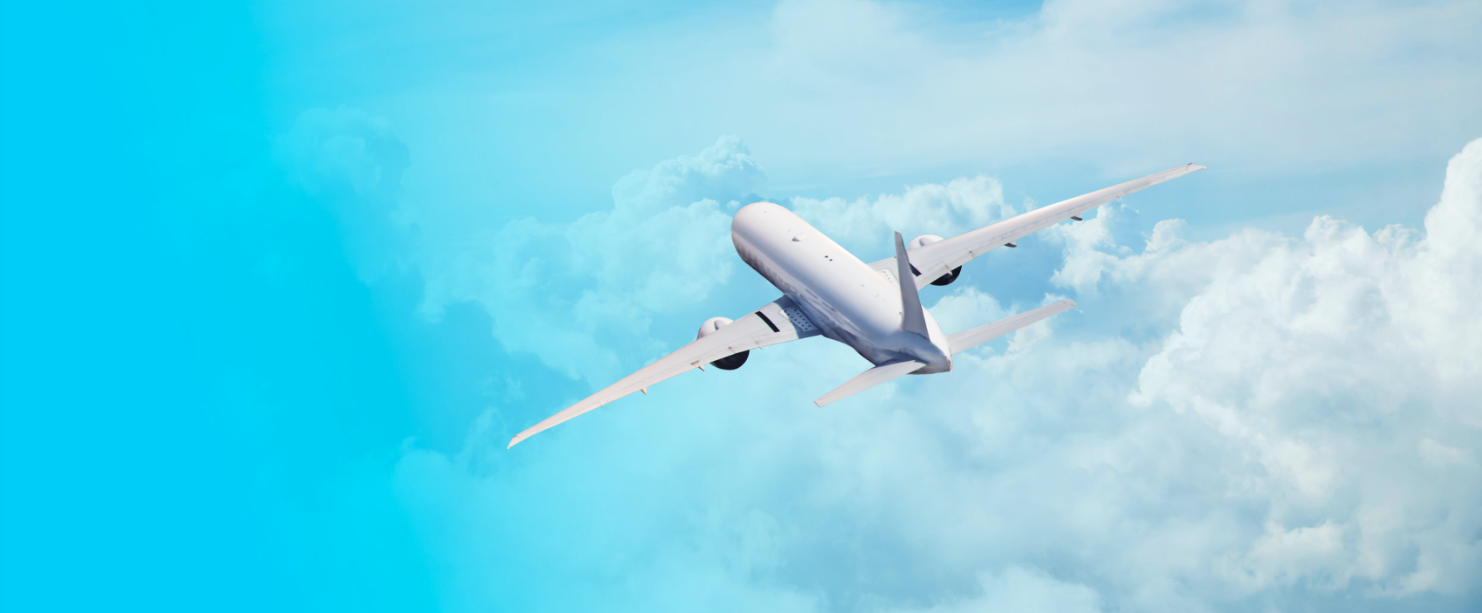

## About Dataset
Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
pd.options.display.max_columns=50

In [3]:
df=pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv",index_col=[0])
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## Workflow
* Understanding of data
* Data cleaning
* Exploratory Data Analysis
* Insights

<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Understanding the data </h1>


In [4]:
# checking rows and columns
df.shape

(103904, 24)

In [5]:
# Checking column names
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
## Cheking percentage of null values
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%")  

Arrival Delay in Minutes --------- 0.29835232522328303 %


<AxesSubplot:>

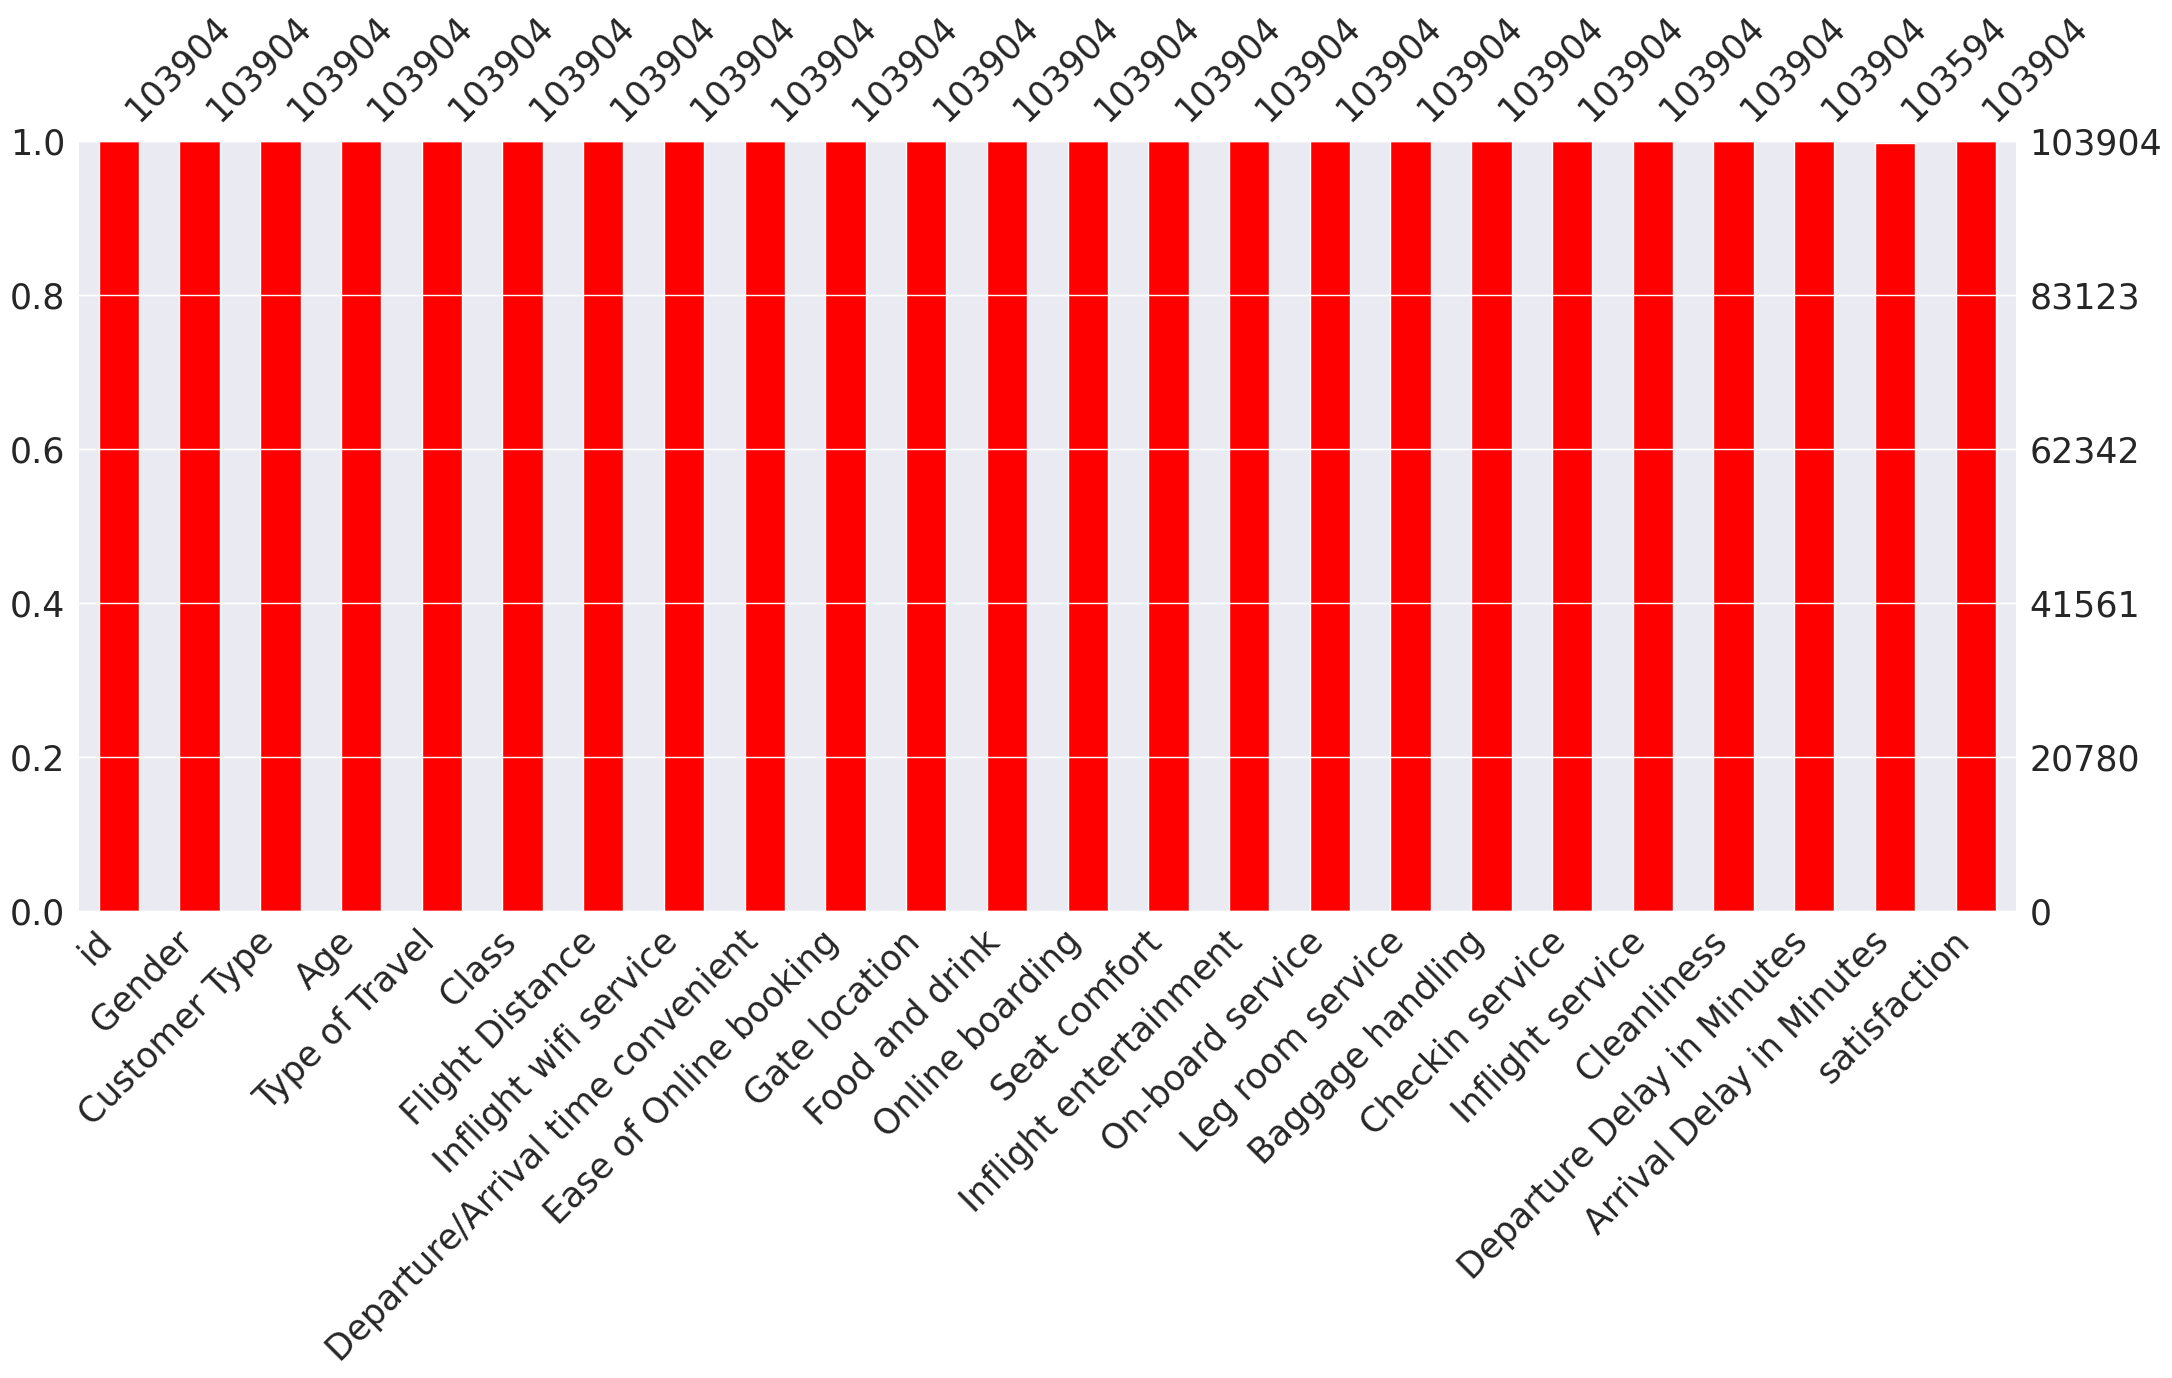

In [8]:
import missingno as msno
msno.bar(df,fontsize=25,color='red')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [10]:
df.describe(include="object").T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [11]:
for i in df.columns:
    print(i,"---------",df[i].unique(),"-----",df[i].nunique())

id --------- [ 70172   5047 110028 ...  68825  54173  62567] ----- 103904
Gender --------- ['Male' 'Female'] ----- 2
Customer Type --------- ['Loyal Customer' 'disloyal Customer'] ----- 2
Age --------- [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] ----- 75
Type of Travel --------- ['Personal Travel' 'Business travel'] ----- 2
Class --------- ['Eco Plus' 'Business' 'Eco'] ----- 3
Flight Distance --------- [ 460  235 1142 ...  974 1479  400] ----- 3802
Inflight wifi service --------- [3 2 4 1 5 0] ----- 6
Departure/Arrival time convenient --------- [4 2 5 3 1 0] ----- 6
Ease of Online booking --------- [3 2 5 4 1 0] ----- 6
Gate location --------- [1 3 2 5 4 0] ----- 6
Food and drink --------- [5 1 2 4 3 0] ----- 6
Online boarding --------- [3 5 2 1 4 0] ----- 6
Seat comfort --------- [5 1 2 3 4 0] ----- 6


<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Data Cleaning </h1>


In [12]:
df.sample()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
38301,6443,Female,Loyal Customer,47,Personal Travel,Eco,296,4,4,4,5,3,4,5,3,3,4,3,4,3,3,0,4.0,neutral or dissatisfied


In [13]:
# Drop column id as it is not usefull
df.drop(columns=["id"],inplace=True)

In [14]:
## Filling the missing values with 0
df["Arrival Delay in Minutes"].fillna(0,inplace=True)

In [15]:
df["Arrival Delay in Minutes"].isnull().sum()

0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


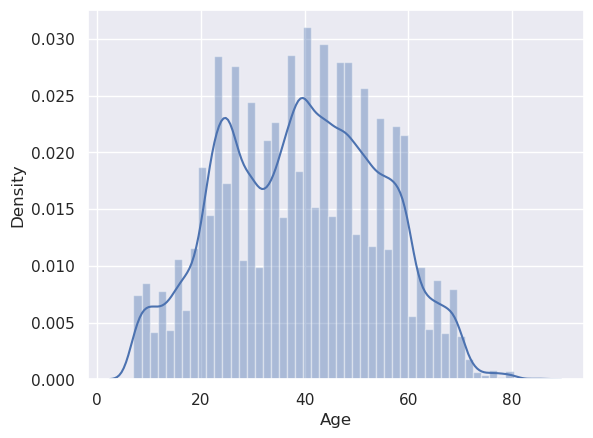

In [16]:
sns.distplot(df["Age"]);

In [17]:
df["Age_category"] = pd.cut(df.Age, [0,14,25,60, np.inf], labels=['children','youth','adults',"senior_citizens"])

In [18]:
df.sample(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_category
48795,Female,Loyal Customer,28,Business travel,Business,3449,1,1,1,1,5,5,5,5,5,3,4,3,4,5,0,0.0,satisfied,adults


In [19]:
df.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021874
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029735
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030597


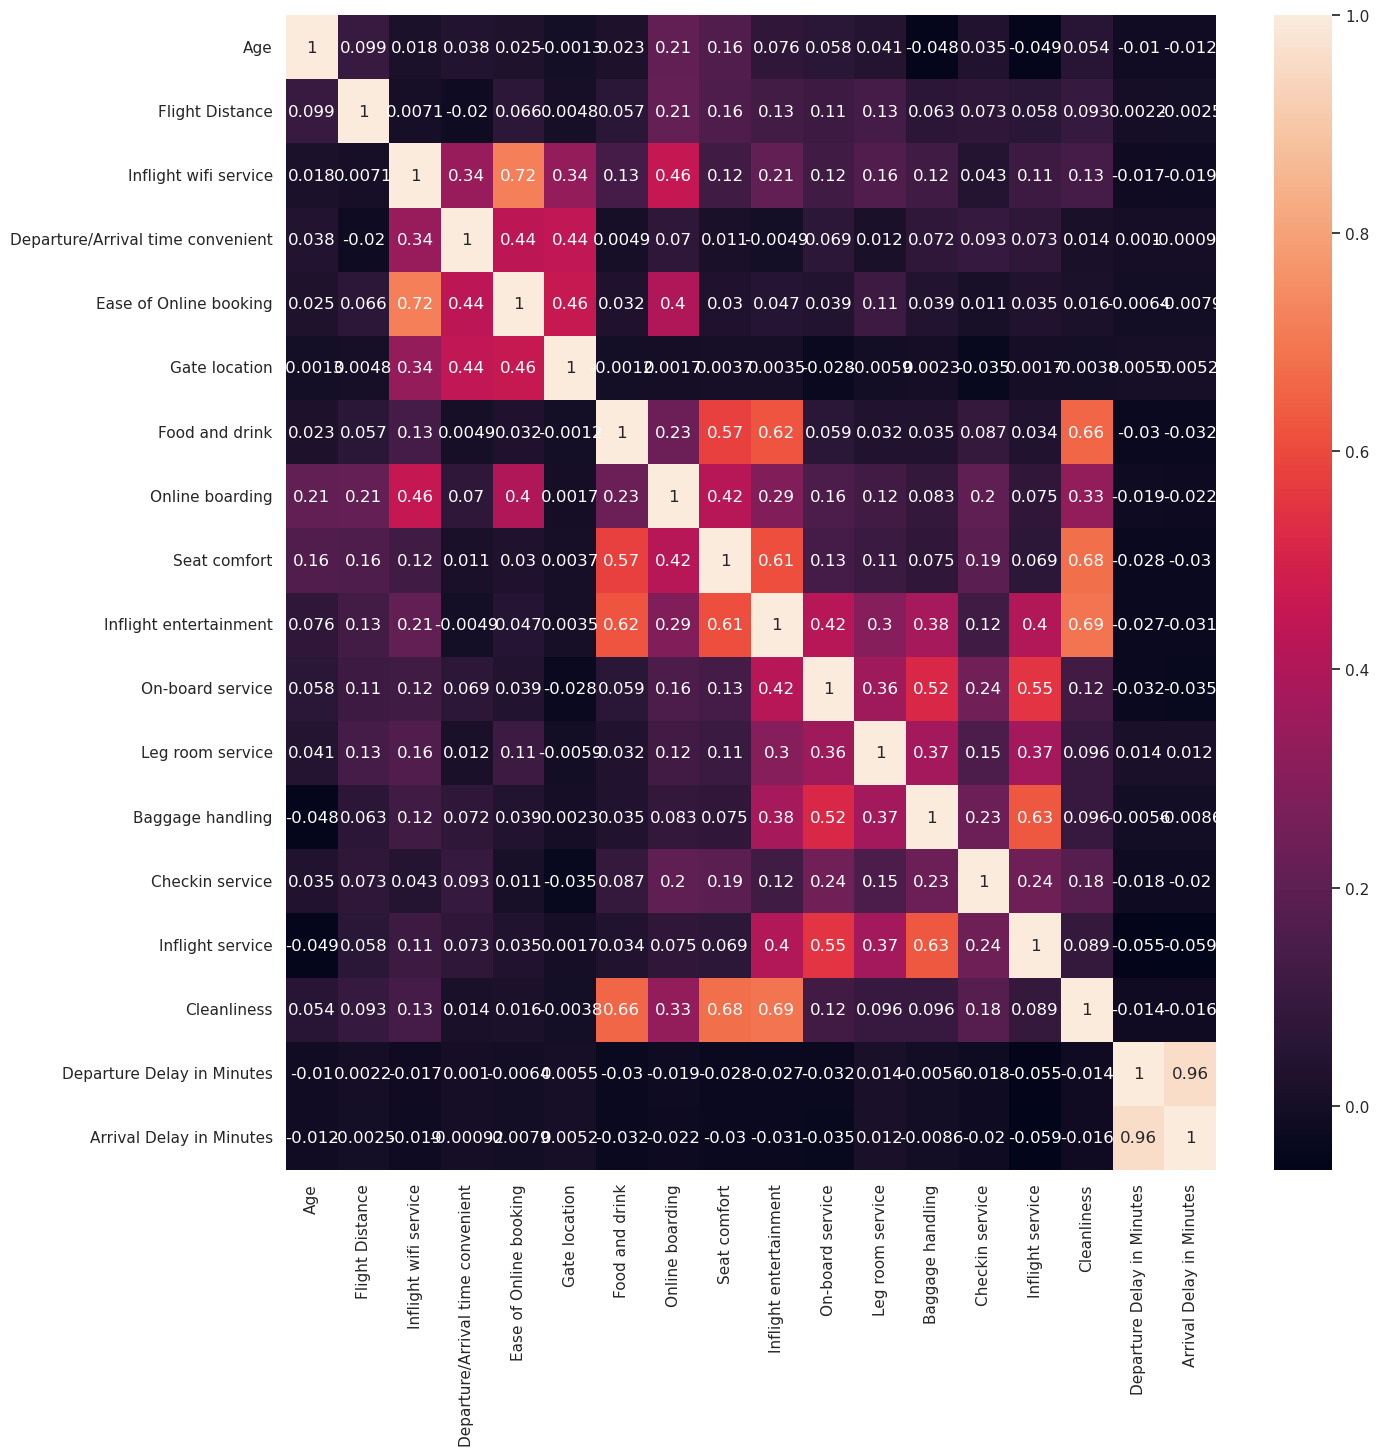

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

#### Arrival delay and Departue delay are highly positive correlated & INsight wifi service and ease of online booking are sort of correlated

<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">EDA</h1>


In [21]:
df.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_category
92189,Male,Loyal Customer,22,Personal Travel,Eco,1017,1,0,1,5,1,1,1,1,3,5,4,3,4,1,0,0.0,neutral or dissatisfied,youth


Female    52727
Male      51177
Name: Gender, dtype: int64


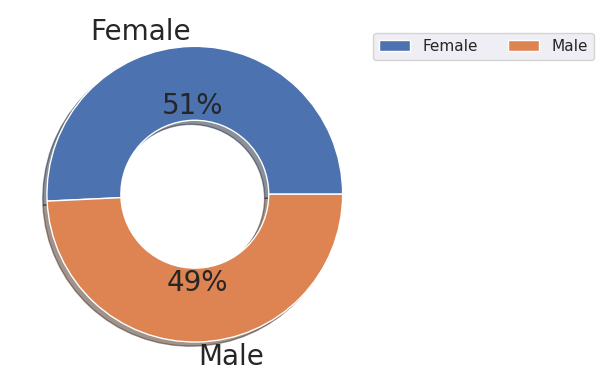

In [22]:
## How many males and females were travelling
g=df["Gender"].value_counts()
print(g)
plt.pie(g,labels=df["Gender"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.5},textprops={"fontsize":20})
plt.legend(loc="center right",bbox_to_anchor=(1.6, 0.9),ncol=2);

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


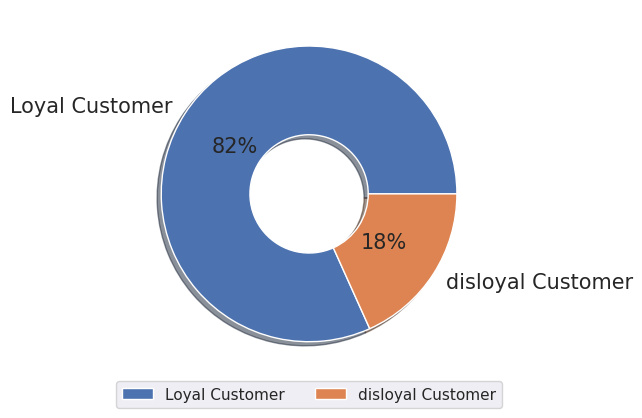

In [23]:
# How many customers types were there
c=df["Customer Type"].value_counts()
print(c)
plt.pie(c,labels=df["Customer Type"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

In [24]:
## What were the avg, min and max age group travelling 
df["Age"].agg(["mean","min","max"]).to_frame()

,Age
mean,39.379706
min,7.000000
max,85.000000


Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


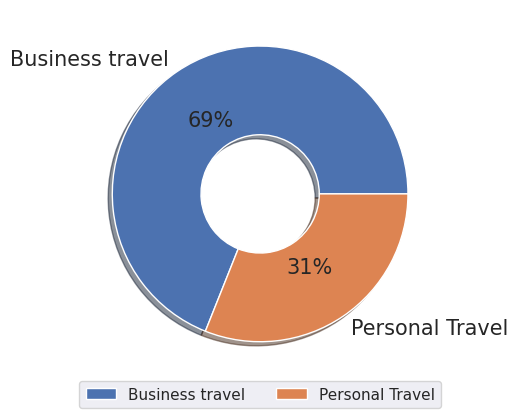

In [25]:
# Which type of travel were frequend
t=df["Type of Travel"].value_counts()
print(t)
plt.pie(t,labels=df["Type of Travel"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=2);

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


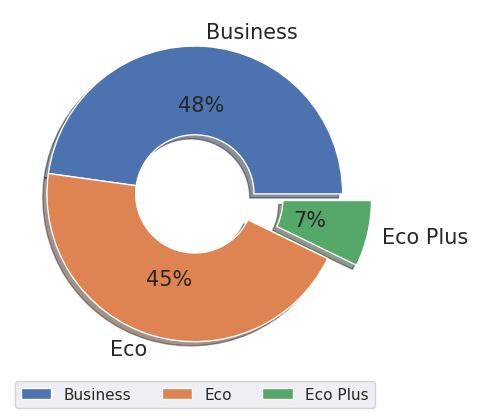

In [26]:
## Which class travellers were most 
c=df["Class"].value_counts()
print(c)
plt.pie(c,labels=df["Class"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15},explode=[0,0,0.2])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3)

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


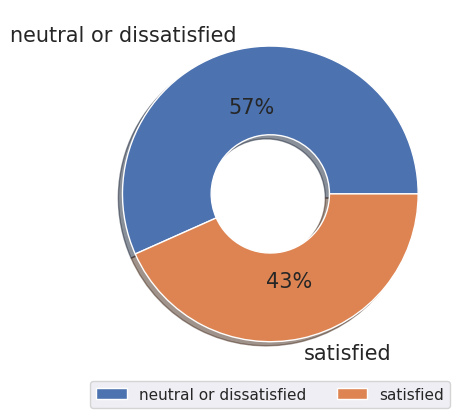

In [27]:
## Which type of satisfaction rating are mostly given by customers
s=df["satisfaction"].value_counts()
print(s)
plt.pie(s,labels=df["satisfaction"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":15})
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64


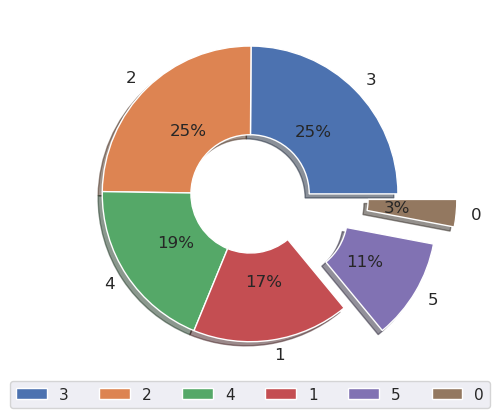

In [28]:
## Wifi service rating by the customer
w=df["Inflight wifi service"].value_counts()
print(w)
plt.pie(w,labels=df["Inflight wifi service"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0,0.3,0.4])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

#### Mostly rating 3 and 2 were given by the cutomers and very few have given 5 and 0

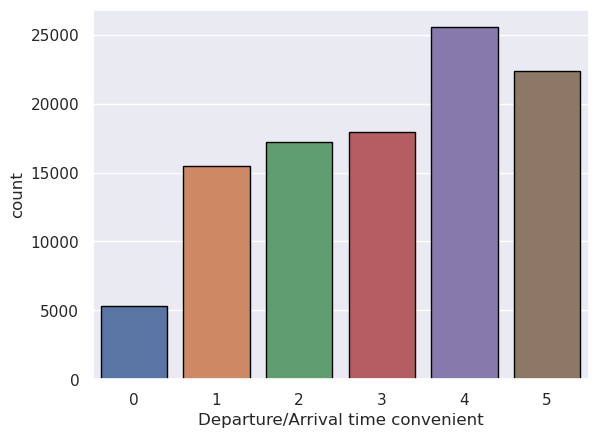

In [29]:
## What were the Departure/Arrival time convenient rating given by the customers
sns.countplot(x="Departure/Arrival time convenient",data=df,edgecolor="black");

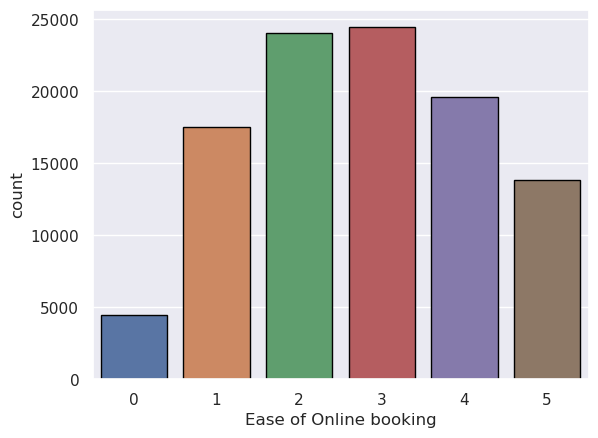

In [30]:
## What were the Ease of Online booking rating given by the customers
sns.countplot(x="Ease of Online booking",data=df,edgecolor="black");

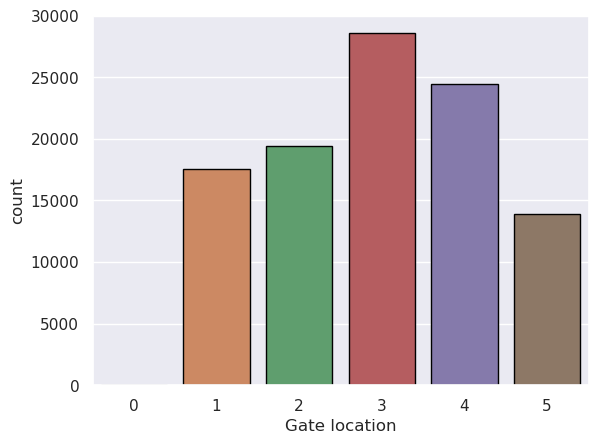

In [31]:
# what was the satisfaction of Gate location
sns.countplot(x="Gate location",data=df,edgecolor="black");

In [32]:
df.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_category
68139,Female,Loyal Customer,49,Business travel,Eco,214,2,2,2,2,5,3,4,3,3,2,3,2,3,2,0,0.0,neutral or dissatisfied,adults


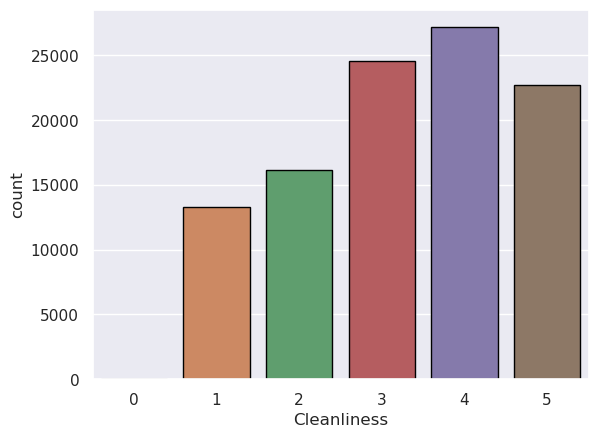

In [33]:
# What was the Satisfaction level of Cleanliness
sns.countplot(x="Cleanliness",data=df,edgecolor="black");

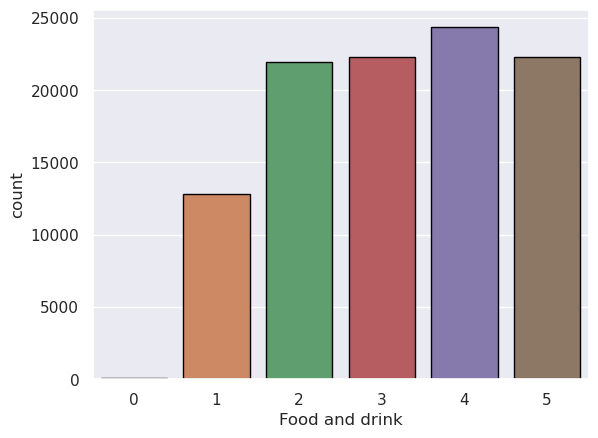

In [34]:
# what was the satisfaction of Food and drink
sns.countplot(x="Food and drink",data=df,edgecolor="black");

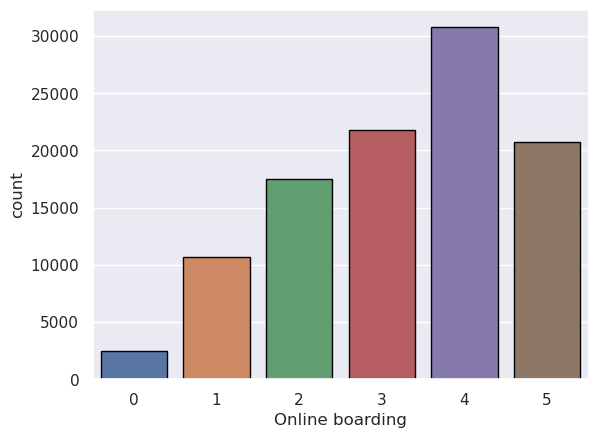

In [35]:
# what was the Satisfaction level of online boarding
sns.countplot(x="Online boarding",data=df,edgecolor="black");

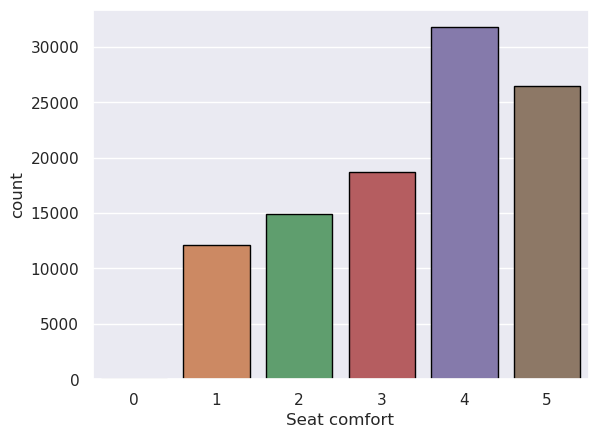

In [36]:
# What was the Satisfaction level of Seat comfort
sns.countplot(x="Seat comfort",data=df,edgecolor="black");

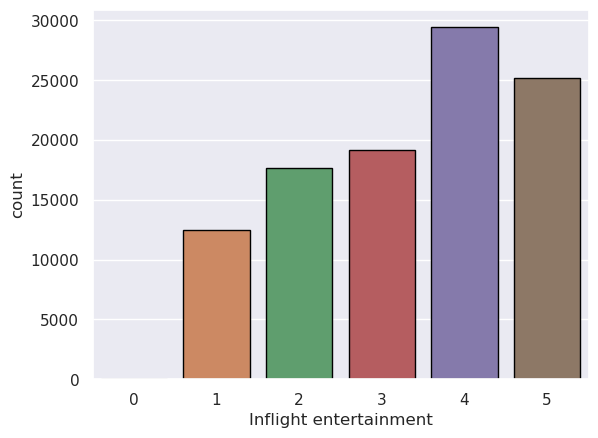

In [37]:
# What was the Satisfaction level of inflight entertainment
sns.countplot(x="Inflight entertainment",data=df,edgecolor="black");

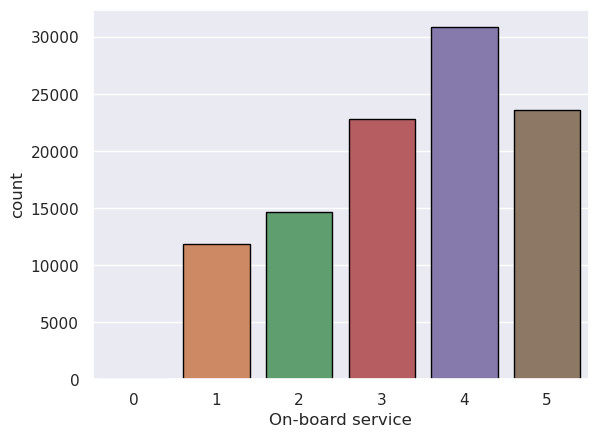

In [38]:
# what was the Satisfaction level of On-board service
sns.countplot(x="On-board service",data=df,edgecolor="black");

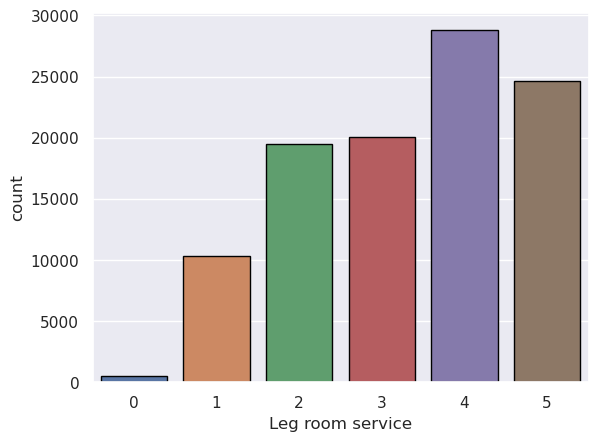

In [39]:
# What was the Satisfaction level of Leg room service
sns.countplot(x="Leg room service",data=df,edgecolor="black");

4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64


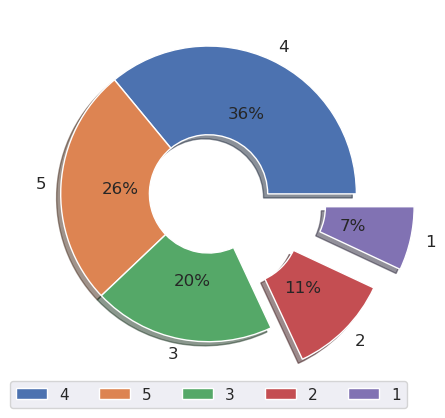

In [40]:
## What was the Satisfaction level of baggage handling
b=df["Baggage handling"].value_counts()
print(b)
plt.pie(b,labels=df["Baggage handling"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0.3,0.4])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64


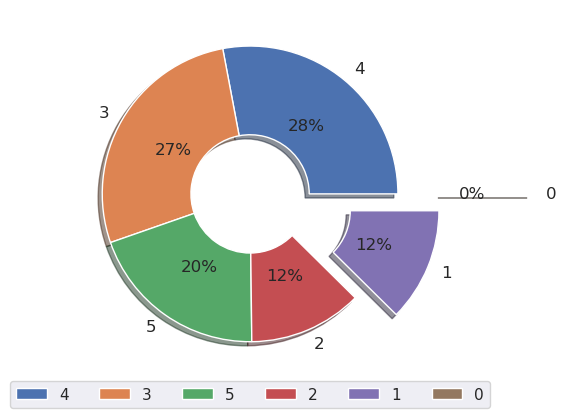

In [41]:
# What was the Satisfaction level of Check-in service
ch=df["Checkin service"].value_counts()
print(ch)
plt.pie(ch,labels=df["Checkin service"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0,0.3,0.9])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64


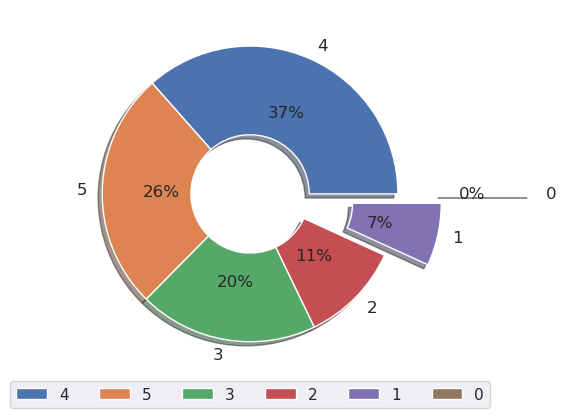

In [42]:
# What wast the Satisfaction level of inflight service
inn=df["Inflight service"].value_counts()
print(inn)
plt.pie(inn,labels=df["Inflight service"].value_counts().index,autopct="%0.0f%%",shadow=True,wedgeprops={"width":0.6},textprops={"fontsize":12},explode=[0,0,0,0,0.3,0.9])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=6);

adults             73315
youth              17383
senior_citizens     7976
children            5230
Name: Age_category, dtype: int64


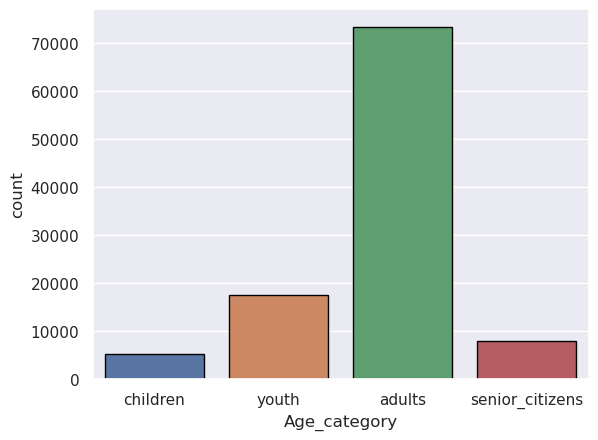

In [43]:
# Which Age category were travellers
print(df["Age_category"].value_counts())
sns.countplot(x="Age_category",data=df,edgecolor="black");

In [44]:
df.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_category
74958,Female,Loyal Customer,58,Personal Travel,Eco,977,3,4,3,3,3,5,5,2,2,3,3,3,2,4,4,13.0,neutral or dissatisfied,adults


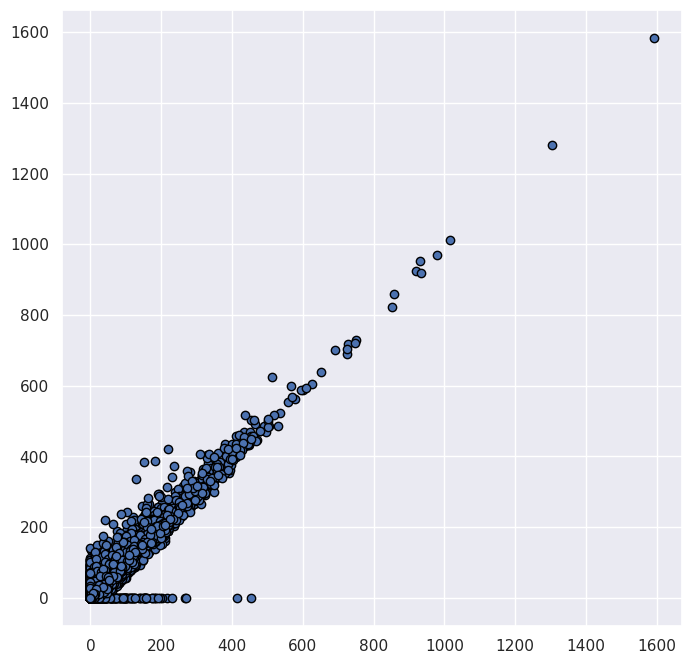

In [62]:
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(df["Departure Delay in Minutes"],df["Arrival Delay in Minutes"],edgecolors="black")

#### They both are related to each other if departure delays the arrival delays also increases


In [46]:
## Which Category of male and female are customers types
df.groupby(["Gender","Age_category"])["Customer Type"].value_counts()

Gender  Age_category     Customer Type    
Female  children         Loyal Customer        2346
                         disloyal Customer      306
        youth            Loyal Customer        5021
                         disloyal Customer     4059
        adults           Loyal Customer       31266
                         disloyal Customer     5690
        senior_citizens  Loyal Customer        3825
                         disloyal Customer      214
Male    children         Loyal Customer        2297
                         disloyal Customer      281
        youth            Loyal Customer        4850
                         disloyal Customer     3453
        adults           Loyal Customer       31567
                         disloyal Customer     4792
        senior_citizens  Loyal Customer        3751
                         disloyal Customer      186
Name: Customer Type, dtype: int64

<AxesSubplot:xlabel='Age_category', ylabel='count'>

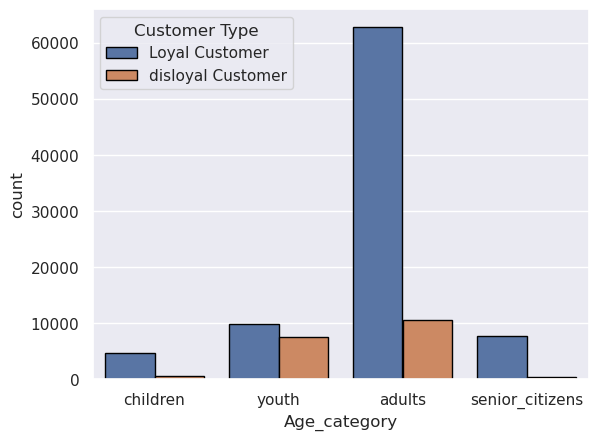

In [64]:
sns.countplot(x="Age_category",hue="Customer Type",data=df,edgecolor="black")

Gender  Age_category     Type of Travel 
Female  children         Personal Travel     2063
                         Business travel      589
        youth            Business travel     6270
                         Personal Travel     2810
        adults           Business travel    28093
                         Personal Travel     8863
        senior_citizens  Personal Travel     2463
                         Business travel     1576
Male    children         Personal Travel     2023
                         Business travel      555
        youth            Business travel     5529
                         Personal Travel     2774
        adults           Business travel    27560
                         Personal Travel     8799
        senior_citizens  Personal Travel     2454
                         Business travel     1483
Name: Type of Travel, dtype: int64


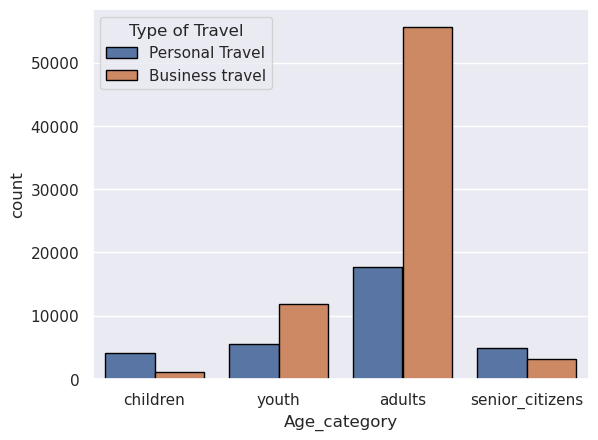

In [65]:
# Which gender and category prefer to do which type of travel
print(df.groupby(["Gender","Age_category"])["Type of Travel"].value_counts())
sns.countplot(x="Age_category",hue="Type of Travel",data=df,edgecolor="black");

Gender  Class   
Female  Business    24927
        Eco         23858
        Eco Plus     3942
Male    Business    24738
        Eco         22887
        Eco Plus     3552
Name: Class, dtype: int64


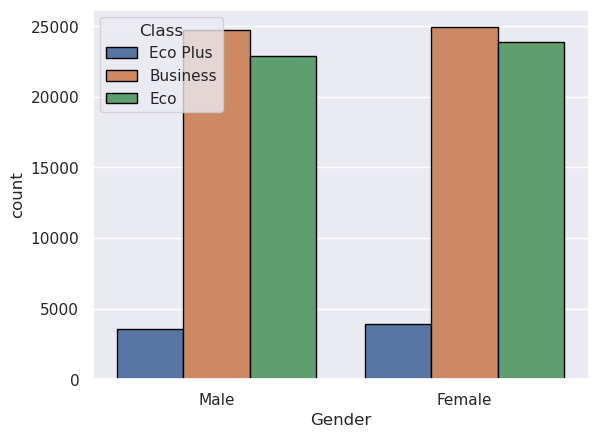

In [66]:
# Which gender use to do which type of travel
print(df.groupby(["Gender"])["Class"].value_counts())
sns.countplot(x="Gender",hue="Class",data=df,edgecolor="black");

In [50]:
## What was the maximum min and avg Flight Distance
df["Flight Distance"].agg(["mean","min","max"]).reset_index()

,index,Flight Distance
0,mean,1189.448375
1,min,31.000000
2,max,4983.000000


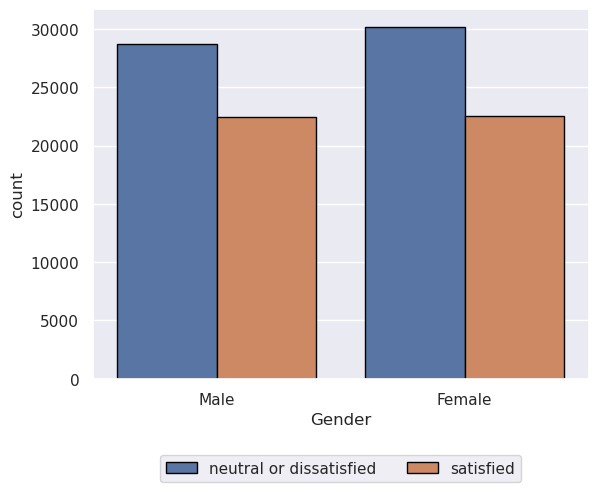

In [67]:
## Which Gender was more satisfied with the flight
df.groupby("Gender")["satisfaction"].value_counts()
sns.countplot(x="Gender",hue="satisfaction",data=df,edgecolor="black");
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),ncol=6);

In [52]:
df.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_category
55629,Female,Loyal Customer,48,Business travel,Business,201,4,4,4,4,2,4,4,5,5,5,5,4,5,3,0,0.0,satisfied,adults


In [53]:
#  3 ratings Percentage given by both males and females
for i in df.columns[6:20]:
    print(len(df[df[i]==3]), "Customers had given 3 average rating in",i)
    print((len(df[df[i]==3])*100)/df[i].count(),"% customers had given 3 rating in",i)
    

25868 Customers had given 3 average rating in Inflight wifi service
24.89605789959963 % customers had given 3 rating in Inflight wifi service
17966 Customers had given 3 average rating in Departure/Arrival time convenient
17.29096088697259 % customers had given 3 rating in Departure/Arrival time convenient
24449 Customers had given 3 average rating in Ease of Online booking
23.530374191561442 % customers had given 3 rating in Ease of Online booking
28577 Customers had given 3 average rating in Gate location
27.5032722513089 % customers had given 3 rating in Gate location
22300 Customers had given 3 average rating in Food and drink
21.4621188789652 % customers had given 3 rating in Food and drink
21804 Customers had given 3 average rating in Online boarding
20.984755158607946 % customers had given 3 rating in Online boarding
18696 Customers had given 3 average rating in Seat comfort
17.993532491530644 % customers had given 3 rating in Seat comfort
19139 Customers had given 3 average rat

In [54]:
#  4 ratings Percentage given by both males and females
for i in df.columns[6:20]:
    print(len(df[df[i]==4]), "Customers had given 4 average rating in",i)
    print((len(df[df[i]==4])*100)/df[i].count(),"% customers had given 4 rating in",i)
    

19794 Customers had given 4 average rating in Inflight wifi service
19.0502771789344 % customers had given 4 rating in Inflight wifi service
25546 Customers had given 4 average rating in Departure/Arrival time convenient
24.58615645210964 % customers had given 4 rating in Departure/Arrival time convenient
19571 Customers had given 4 average rating in Ease of Online booking
18.835655990144748 % customers had given 4 rating in Ease of Online booking
24426 Customers had given 4 average rating in Gate location
23.508238373883586 % customers had given 4 rating in Gate location
24359 Customers had given 4 average rating in Food and drink
23.443755774561133 % customers had given 4 rating in Food and drink
30762 Customers had given 4 average rating in Online boarding
29.606174930705265 % customers had given 4 rating in Online boarding
31765 Customers had given 4 average rating in Seat comfort
30.57148906683092 % customers had given 4 rating in Seat comfort
29423 Customers had given 4 average r

In [55]:
#  5 ratings Percentage given by both males and females
for i in df.columns[6:20]:
    print(len(df[df[i]==5]), "Customers had given 5 average rating in",i)
    print((len(df[df[i]==5])*100)/df[i].count(),"% customers had given 5 rating in",i)
    

11469 Customers had given 5 average rating in Inflight wifi service
11.038073606405913 % customers had given 5 rating in Inflight wifi service
22403 Customers had given 5 average rating in Departure/Arrival time convenient
21.561248845087775 % customers had given 5 rating in Departure/Arrival time convenient
13851 Customers had given 5 average rating in Ease of Online booking
13.330574376347398 % customers had given 5 rating in Ease of Online booking
13879 Customers had given 5 average rating in Gate location
13.357522328303048 % customers had given 5 rating in Gate location
22313 Customers had given 5 average rating in Food and drink
21.474630428087465 % customers had given 5 rating in Food and drink
20713 Customers had given 5 average rating in Online boarding
19.9347474591931 % customers had given 5 rating in Online boarding
26470 Customers had given 5 average rating in Seat comfort
25.475438866646137 % customers had given 5 rating in Seat comfort
25213 Customers had given 5 average

In [56]:
# AVerage 3 rating given by males
x=df[df["Gender"]=="Male"]
for i in x.columns[6:20]:
    print(len(x[x[i]==3]), "Customers had given 3 average rating in",i)
    print((len(x[x[i]==3])*100)/x[i].count(),"% customers had given 3 rating in",i)
    


12693 Customers had given 3 average rating in Inflight wifi service
24.80215721906325 % customers had given 3 rating in Inflight wifi service
8811 Customers had given 3 average rating in Departure/Arrival time convenient
17.216718447740195 % customers had given 3 rating in Departure/Arrival time convenient
12076 Customers had given 3 average rating in Ease of Online booking
23.59653750708326 % customers had given 3 rating in Ease of Online booking
13948 Customers had given 3 average rating in Gate location
27.254430701291597 % customers had given 3 rating in Gate location
10847 Customers had given 3 average rating in Food and drink
21.195068096996696 % customers had given 3 rating in Food and drink
10735 Customers had given 3 average rating in Online boarding
20.976219786232097 % customers had given 3 rating in Online boarding
9005 Customers had given 3 average rating in Seat comfort
17.59579498602888 % customers had given 3 rating in Seat comfort
9362 Customers had given 3 average rat

In [57]:
# AVerage 3 rating given by males
f=df[df["Gender"]=="Female"]
for i in x.columns[6:20]:
    print(len(f[f[i]==3]), "Customers had given 3 average rating in",i)
    print((len(f[f[i]==3])*100)/f[i].count(),"% customers had given 3 rating in",i)
    



13175 Customers had given 3 average rating in Inflight wifi service
24.98719820964591 % customers had given 3 rating in Inflight wifi service
9155 Customers had given 3 average rating in Departure/Arrival time convenient
17.36302084321126 % customers had given 3 rating in Departure/Arrival time convenient
12373 Customers had given 3 average rating in Ease of Online booking
23.46615585942686 % customers had given 3 rating in Ease of Online booking
14629 Customers had given 3 average rating in Gate location
27.744798679993174 % customers had given 3 rating in Gate location
11453 Customers had given 3 average rating in Food and drink
21.72131924820301 % customers had given 3 rating in Food and drink
11069 Customers had given 3 average rating in Online boarding
20.993039619170442 % customers had given 3 rating in Online boarding
9691 Customers had given 3 average rating in Seat comfort
18.379577825402546 % customers had given 3 rating in Seat comfort
9777 Customers had given 3 average rati

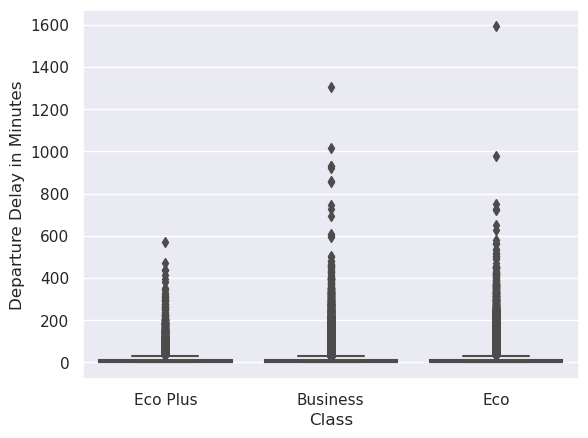

In [58]:
# Which type of flights mostly delayed
sns.boxplot(x="Class",y="Departure Delay in Minutes",data=df);

In [77]:
df.to_csv("Airline passenger EDA.csv")

<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Insights </h1>

* Dropping columns Id, Filling column Arrival delay with value 0, Adding column Age_category according to age through feature Engineering.
* Female and male were equal travellers, And Loyal Customers were more 
* Mostly Business travels were done 
* Most of the people use Business and Eco class 
* Mostly Customers are neutal and Dissatisfied with the service 
* The Average rating of 3 and 4 were the most given by both males and females
* Arrival delay and Departure delay are highly correlated 
* Adult were the most Travellers which is between 25 to 40